## Deep SARSA in Cartpole using Keras-RL.
#### This is a step-by-step guide to using a neural network-based SARSA in Cartpole, a simple OpenAI gym environment.


In [1]:
import collections
import numpy as np
import gym

from keras.layers import Dense, Flatten, Activation, Input, Lambda
from keras.models import Sequential, Model
from keras.optimizers import Adam

from rl.agents import SARSAAgent
from rl.agents.dqn import mean_q

from rl.callbacks import TrainEpisodeLogger
from rl.policy import EpsGreedyQPolicy, GreedyQPolicy, BoltzmannQPolicy, MaxBoltzmannQPolicy

from keras.utils import plot_model
import keras.backend as K

/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/tensorflow/__init__.py:29: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils as _distutils
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/keras/utils/image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/home/wasf84/Documentos/pgmc

## Deep SARSA in Cartpole

In [2]:
#Setting up the environment
env = gym.make('CartPole-v1')
seed_val = 261
env.seed(seed_val)
np.random.seed(seed_val)

# tive de fazer essa mutreta para poder rodar em multithread
# se colocar um '_max_episode_steps' MENOR que 'max_steps', dá problema com truncamento no método 'sarsa.fit'
# pesquisando na internet descobri que é por causa exatamente da otimização do código para rodar em multithread
# não entendi bem porque isso, não achei alguém explicando exatamente o problema, apenas falando como resolveu
max_steps=50000
env._max_episode_steps = max_steps

#Getting the state and action space
states = env.observation_space.shape[0]
actions = env.action_space.n

#Defining a Neural Network function for our Cartpole agent 
def agent(states, actions):
    """Creating a simple Deep Neural Network."""
    model = Sequential()
    model.add(Flatten(input_shape = (1, states)))
    model.add(Dense(30, activation='swish'))
    model.add(Dense(30, activation='swish'))
    model.add(Dense(actions, activation='linear'))
    return model

/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the f

In [3]:
#Getting our neural network
model = agent(states, actions)

#Defining SARSA Keras-RL agent: inputing the policy and the model
sarsa = SARSAAgent(model=model, nb_actions=actions, policy=MaxBoltzmannQPolicy())

#Compiling SARSA with mean squared error loss
sarsa.compile('adam', metrics=["mse"])

#Training the agent for max_steps steps
sarsa.fit(env, nb_steps=max_steps, visualize=False, verbose=1)

/home/wasf84/Documentos/pgmc-mestrado/agentes_inteligentes/notebooks/deep-learning/dl-env/lib/python3.10/site-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-09-01 17:43:12.907809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-01 17:43:12.913904: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 1.0000
262 episodes - episode_reward: 37.718 [8.000, 212.000] - loss: 7.560 - mse: 577.563 - mean_q: 31.455

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 35s 3ms/step - reward: 1.0000
90 episodes - episode_reward: 111.067 [15.000, 377.000] - loss: 6.462 - mse: 1308.064 - mean_q: 49.056

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 35s 4ms/step - reward: 1.0000
52 episodes - episode_reward: 182.250 [11.000, 1209.000] - loss: 6.373 - mse: 2303.101 - mean_q: 66.765

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 1.0000
2 episodes - episode_reward: 5248.000 [27.000, 10469.000] - loss: 0.925 - mse: 4925.528 - mean_q: 99.956

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 34s 3ms/step - reward: 1.000

In [4]:
#Fitting and testing our agent model for 200 episodes
scores = sarsa.test(env, nb_episodes = 200, visualize = False)

Testing for 200 episodes ...
Episode 1: reward: 2899.000, steps: 2899
Episode 2: reward: 2955.000, steps: 2955
Episode 3: reward: 2181.000, steps: 2181
Episode 4: reward: 2602.000, steps: 2602
Episode 5: reward: 2018.000, steps: 2018
Episode 6: reward: 2827.000, steps: 2827
Episode 7: reward: 2284.000, steps: 2284
Episode 8: reward: 2208.000, steps: 2208
Episode 9: reward: 2130.000, steps: 2130
Episode 10: reward: 2096.000, steps: 2096
Episode 11: reward: 2709.000, steps: 2709
Episode 12: reward: 2270.000, steps: 2270
Episode 13: reward: 2876.000, steps: 2876
Episode 14: reward: 2727.000, steps: 2727
Episode 15: reward: 2738.000, steps: 2738
Episode 16: reward: 2957.000, steps: 2957
Episode 17: reward: 2136.000, steps: 2136
Episode 18: reward: 2480.000, steps: 2480
Episode 19: reward: 2080.000, steps: 2080
Episode 20: reward: 2487.000, steps: 2487
Episode 21: reward: 2015.000, steps: 2015
Episode 22: reward: 2504.000, steps: 2504
Episode 23: reward: 2591.000, steps: 2591
Episode 24: re

In [5]:
#Importing the necessary plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

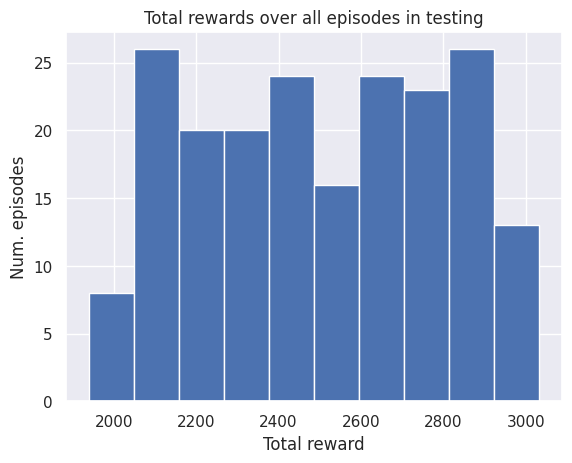

In [6]:
#Visualizing our resulted rewards
#plt.plot(scores.history['episode_reward'])
plt.hist(scores.history['episode_reward'])
plt.xlabel('Total reward')
plt.ylabel('Num. episodes')
plt.title('Total rewards over all episodes in testing') 
plt.show()

In [7]:
#Getting the action probabilities vector
#np.array(sarsa.q_values)

In [8]:
#Saving our model
#sarsa.save_weights('sarsa_{}_weights.h5f'.format(env), overwrite=True)